<a href="https://colab.research.google.com/github/gisalgs/notebooks/blob/main/centroid-area-3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Polygon Centroid and Area

This is a combined version of some of the topics on polygons.

We represent a polygon of $n$ points as $(x_1, y_1), (x_2, y_2),...,(x_n,y_n),(x_{n+1},y_{n+1})$, where we add an additional point in the sequence $(x_{n+1}, y_{n+1}) = (x_1,y_1)$ to ensure that the polygon is closed.

## Polygon area

A robust way to computing polygon area is to decompose the polygon into a set of **trapezoids**. Every line segment on the polygon boundary can form a trapezoid with the corresponding segment on the horizontal axis, as illustrated by the following figure:

![](https://github.com/gisalgs/notebooks/blob/main/figures/polygon-area-trapezoids.png?raw=1)

We first get the sum of areas of all trapezoids formed by the upper line segments of the polygon. We then subtract this sum of areas by the sum of areas of the trapezoids formed by the lower lines. The following equation can then be used to compute the **polygon area** after decomposing it into a series of trapezoids. Note the order the points in the sequence is important and this is why we take the absolute value here.

$A = \frac{1}{2} \sum_{i=1}^n (x_{i+1} - x_i) (y_{i+1} + y_i) $

Polygon areas can also be computed using the following cross-product form that can be derived using a triangulation procedure. We will just give this form here while more details can be found in an optional tutorial in this class. This is more convenient for calculation.

$A = \frac{1}{2} \sum_{i=1}^n (x_i y_{i+1} - x_{i+1} y_i) $

In the actual computation of areas, the result might be negative if the points are chained counterclockwise and we will need to take the absolute value of the result.

## Polygon centroid

The **centroid** of a polygon can be defined in various ways. However, it is common to think that the gravity center of the polygon is the centroid. If the boundaries of the polygon do not intersect, the centroid of the polygon is determined as

$x = \frac{1}{6A} \sum_{i=1}^n (x_i + x_{i+1}) (x_i y_i - x_{i+1}y_i)$

$y = \frac{1}{6A} \sum_{i=1}^n (y_i + y_{i+1}) (x_i y_i - x_{i+1}y_i)$

where $A$ is the area of the polygon as calculated using the above formulas.

There is a lot of similarity in calculating the centroid and the area of a polygon. This makes sense because we want the centroid to be close to the gravity center of the polygon. In other words, we weight the centroid by the areas. For this reason, we write one single function that does both.

## Handling exceptions

One important issue in the above algorithm is that we require the polygon to be closed. Otherwise, there will be errors. There are different ways to handle this. For example, we can simply return a `None` if the polygon is not closed. However, to make the code look more formal, we are going to tell Python that there is an error (in this way, we don't let errors go without being notified) and we want to stop running the code (because something important might just be dependent on the successful calculation of the area). This is what we call **to raise an error**. We will simply use a generic exception in Python to do this. In the following code, we will see the program stops after it prints 5 and then trows an exception:

```python
for i in range(10):
    print(i, end=' ')
    if i == 5:
        raise Exception('Just a test')
        
print('DONE')
```


It appears that when the exception is raised, the program will stop. But we can catch the exception and process it before we decide if we need to end the program or not. (For most of the cases, since we have caught the exception, we probably should know how to handle it and therefore it makes no sense to stop the program unless it is really necessary.)

In [29]:
try:
    for i in range(10):
        print(i, end=' ')
        if i == 5:
            raise Exception('Just an error')
except Exception as err:
    print(err)
    print('Not done yet!')
else:
    print('DONE')

0 1 2 3 4 5 Just an error
Not done yet!


## Getting polygon centroid and area

Now, we define a function called `centroid` that returns both area and centroid of a given polygon.

```python
def centroid(polygon):
    if polygon[0] != polygon[-1]:
        raise Exception('Polygon not closed')
    num_point = len(polygon)
    A = 0
    xmean = 0
    ymean = 0
    for i in range(num_point-1):
        p1 = polygon[i]
        p2 = polygon[i+1]
        ai = p1.x * p2.y - p2.x * p1.y
        A += ai
        xmean += (p2.x + p1.x) * ai
        ymean += (p2.y + p1.y) * ai
    A = A/2.0
    C = Point(xmean/(6*A), ymean/(6*A))
    return abs(A), C
```

### Using Jupyter Notebook and Colab

The complete version of the above code is available from the github site at [here](https://github.com/gisalgs/geom/blob/master/centroid.py). The code is saved in a file called **centroid.py** and we will put it in the same folder of geom as the point.py file. (Note that the above code is simply listed here but not executed.) Now we can use the centroid algorithm in the following example.

This tutorial will be run on-the-fly in Google Colab. Because of that, it is necessary to load our geometry Python modules (such as point.py). The following line of code clones exactly the entire repository into the running environment of his notebook. Please note this is only needed to run in colab. To run the code in the tutorial in our own local computer using a Python interactive mode, we will use what we did before (i.e., downloading the necessary .py files from the github repo, and putting them in the right folder). There is no need to run this in local Python environment. This line should not be included in a Python program either.



In [30]:
!git clone https://github.com/gisalgs/geom.git

fatal: destination path 'geom' already exists and is not an empty directory.


The above line may show an error that the path exists already. This happens when it is run multiple times. No need to alert. If we are curious about where the module is actually installed, the following command in the notebook can tell us:

```
pwd
```

Or we can use Python to see the current folder:

```python
import os
os.getcwd()
```

If the code in this tutorial is run in a local Python interactive mode, we can use the following before we import:

```python
import sys
sys.path.append('/home/xiao/lib/gisalgs')
```

Once the github repo is cloned, it is also loaded and ready to use.

In [31]:
from geom.point import *
from geom.centroid import *

In [32]:
points = [ [1,1], [4,3], [8,3], [8,3.5], [4,3.5], [1,5], [1,1] ]
points = [Point(p[0], p[1]) for p in points]

result = centroid(points)
print('The area is %s and centroid is at %s'%(result[0], result[1]))

points.reverse()
points = [Point(p[0], p[1]) for p in points]

result = centroid(points)
print('The area is %s and centroid is at %s'%(result[0], result[1]))

try:
    result = centroid(points[:-2])
except Exception as err:
    print(err)
else:
    print(result)

The area is 8.75 and centroid is at (3.0, 3.1)
The area is 8.75 and centroid is at (3.0, 3.1)
Polygon not closed


## Case study: Centroids

Why the centroid formula looks like what is presented before? Why not we just calculate the mean values of the X and Y coordinates of the points of the polygon? Here we will use an example to demonstrate this. (Again, the first line of code is not needed for Python interpreter other than the iPython notebook.)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

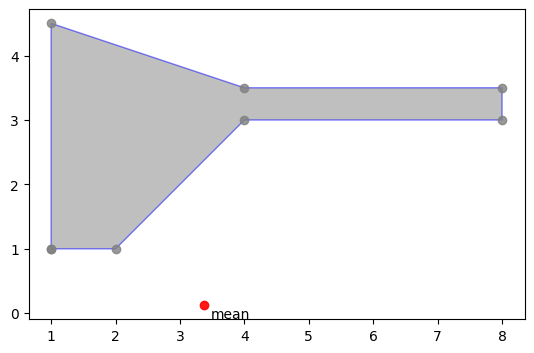

In [34]:
points = [ [1,1], [2,1], [4,3], [8,3], [8,3.5], [4,3.5], [1,4.5], [1,1] ]

polygon = [ Point(p[0], p[1]) for p in points ]

# TODO: compute the mean of the X coordinates in polygon as x
#       make sure the point at (1, 1) is only used once
x_org = polygon[0].x

sum_x = x_org  # sum of x
for t in range (len (polygon)):
  if polygon[t].x != x_org:
    sum_x += polygon[t].x


x = sum_x / len(polygon) # Calculation

y_org = polygon[0].y
sum_y = y_org # sum of y
for i in range (len (polygon)):
  if polygon[i].y != y_org:
    sum_y / len (polygon)


# TODO: compute the mean of the Y coordinates in polygon as y
#       make sure the point at (1, 1) is only used once
y = sum_y / len (polygon) # Final calculation for y

d = Point(x, y)

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in polygon], [p.y for p in polygon], color='grey', marker='o', alpha=0.8)

ax.plot(d.x, d.y, marker='o', color='red', alpha=.9)
ax.text(d.x+0.1, d.y-0.2, 'mean')

ax.set_aspect(1)

plt.show()


In [35]:
d

[3.375, 0.125]

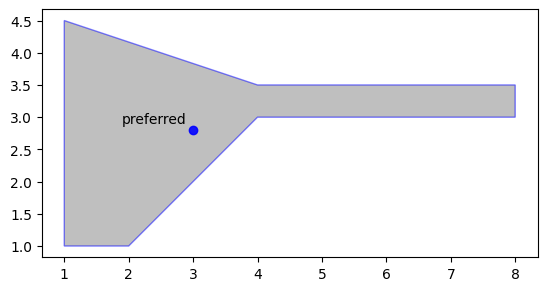

In [36]:
_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

# TODO: what would be the coordinates for a centroid that is more preferred?
#       use any reasonable numbers below
preferred = Point(3.0,2.8)


ax.plot(preferred.x, preferred.y, color='blue', marker='o', alpha=.9)
plt.text(preferred.x-0.1, preferred.y+0.1, 'preferred', ha='right')


ax.set_aspect(1)
plt.show()


Now we put both the average point (mean) and the centroid (gravity center) together.

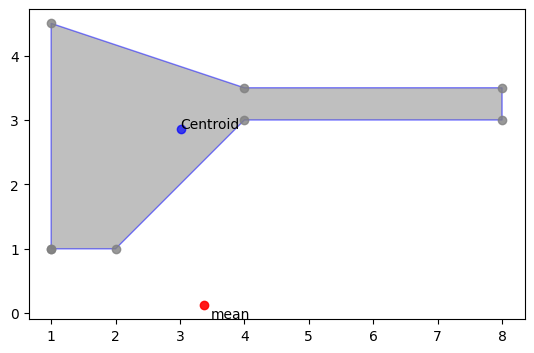

In [37]:
points = [ [1,1], [2,1], [4,3], [8,3], [8,3.5], [4,3.5], [1,4.5], [1,1] ]

polygon = [ Point(p[0], p[1]) for p in points ]

# TODO: compute the mean of the X coordinates in polygon as x
#       make sure the point at (1, 1) is only used once
x_org = polygon[0].x

sum_x = x_org  # sum of x
for t in range (len (polygon)):
  if polygon[t].x != x_org:
    sum_x += polygon[t].x
x = sum_x / len (polygon)
# TODO: compute the mean of the Y coordinates in polygon as y
#       make sure the point at (1, 1) is only used once

y_org = polygon[0].y
sum_y = y_org # sum of y
for i in range (len (polygon)):
  if polygon[i].y != y_org:
    sum_y / len (polygon)

y = sum_y / len (polygon) # Final calculation for y

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in polygon], [p.y for p in polygon], color='grey', marker='o', alpha=0.8)

# TODO:
#       calculate the centroid of the polygon
#       plot it here
#       draw a label next to the centroid
#

# centroid of polygon
area_p, centroid_p = centroid(polygon)

# plotting it
plt.scatter(centroid_p.x, centroid_p.y, color = "blue", alpha = 0.7)

plt.text(centroid_p.x, centroid_p.y, "Centroid")

d = Point(x, y)
plt.scatter([d.x], [d.y], color='red', alpha=.9)
plt.text(d.x+0.1, d.y-0.2, 'mean')

ax.set_aspect(1)
plt.show()


The centroid (gravity center) can still be outside the polygon (see questions below). This can be a problem when we really want it to be inside. [Here](https://www.mapbox.com/blog/polygon-center/) is a method to get the visual center of a polygon that is bound to be inside the polygon.

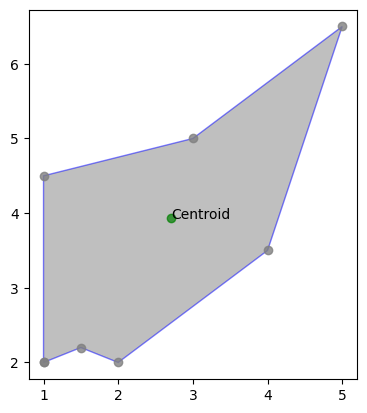

In [38]:
# TODO: design a polygon so that its centroid is outside the polygon
#       In other words, complete the following line to give specific coordinates to points.
points = [ [1,2], [1,4.5], [3,5], [5,6.5], [4,3.5], [2,2], [1.5,2.2], [1,2]]

polygon = [ Point(p[0], p[1]) for p in points ]

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in polygon], [p.y for p in polygon], color='grey', marker='o', alpha=0.8)

# TODO: calculate the centroid of the polygon and plot it here

area_p, centroid_p = centroid(polygon)
plt.scatter(centroid_p.x, centroid_p.y, color = "green", alpha = 0.7)
plt.text (centroid_p.x, centroid_p.y, "Centroid")

ax.set_aspect(1)
plt.show()
